C:\Users\jeyas\anaconda3\envs\mnist_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


C:\Users\jeyas\anaconda3\envs\mnist_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.3046 - loss: 1.8808 - val_accuracy: 0.4819 - val_loss: 1.4137
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.5168 - loss: 1.3580 - val_accuracy: 0.5525 - val_loss: 1.2779
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5851 - loss: 1.1862 - val_accuracy: 0.5911 - val_loss: 1.1602
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6236 - loss: 1.0715 - val_accuracy: 0.6215 - val_loss: 1.0834
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6570 - loss: 0.9799 - val_accuracy: 0.6409 - val_loss: 1.0211
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.6768 - loss: 0.9254 - val_accuracy: 0.6589 - val_loss: 0.9834
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7008 - loss: 0.8658 - val_accuracy: 0.6659 - val_loss: 0.9743
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7170 - loss: 0.8142 - 

Enter an index (0 to 9999) for test image:  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


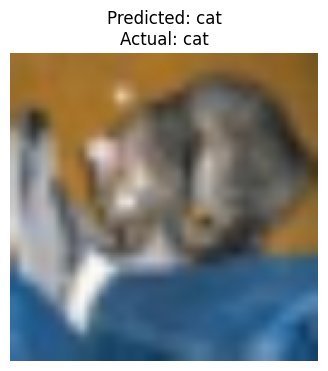

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get user input for image index
index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

# Prepare the test image
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Make prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the image with prediction
plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image.numpy())  # Convert to numpy for plotting
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()
